In [29]:
import os
import math
import re
import statistics
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import product
from scipy.stats import pearsonr
from scipy.stats import kendalltau


#For proper display of all columns
from IPython.display import display
pd.options.display.max_columns = None

import warnings
warnings.filterwarnings("ignore")
import gc

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

import scipy.stats as stats

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

from catboost import CatBoostRegressor, Pool

In [30]:
all_backup_csv_path = '../backup_csv/backup_all_song_features_csv.csv'
bangladesh_backup_csv_path = '../backup_csv/backup_bangladesh_song_features_csv.csv'
kolkata_backup_csv_path = '../backup_csv/backup_kolkata_song_features_csv.csv'

In [31]:
scaled_all_backup_csv_path = '../backup_csv/scaled_backup_all_song_features_csv.csv'
scaled_bangladesh_backup_csv_path = '../backup_csv/scaled_backup_bangladesh_song_features_csv.csv'
scaled_kolkata_backup_csv_path = '../backup_csv/scaled_backup_kolkata_song_features_csv.csv'

In [32]:
alls = pd.read_csv(scaled_all_backup_csv_path)
bd = pd.read_csv(scaled_bangladesh_backup_csv_path)
ind = pd.read_csv(scaled_kolkata_backup_csv_path)

In [43]:
# alls.head(5).T

In [44]:
# bd.head(5).T

In [45]:
# ind.head(5).T

In [46]:
print("All Songs")
alls.describe([.1,.25,.5,.75,.9,.99]).T

All Songs


,count,mean,std,min,10%,25%,50%,75%,90%,99%,max
Country,155.0,0.529032,0.500774,0.0,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0
Popularity,155.0,0.508798,0.249844,0.0,0.181818,0.318182,0.545455,0.715909,0.818182,1.000000,1.0
Time Signature,155.0,0.425806,0.195680,0.0,0.000000,0.500000,0.500000,0.500000,0.500000,0.730000,1.0
Duration MS,155.0,0.186294,0.112048,0.0,0.074660,0.107365,0.171591,0.232796,0.294536,0.493483,1.0
Tempo,155.0,0.440659,0.222329,0.0,0.143047,0.225688,0.471032,0.570627,0.715099,0.961171,1.0
Valence,155.0,0.414502,0.221050,0.0,0.145684,0.260583,0.382078,0.572292,0.713909,0.956328,1.0
Liveness,155.0,0.175408,0.153968,0.0,0.040792,0.080102,0.110637,0.257085,0.353018,0.733357,1.0
Instrumentalness,155.0,0.013423,0.087387,0.0,0.000000,0.000000,0.000021,0.000735,0.007130,0.289341,1.0
Acousticness,155.0,0.305000,0.320945,0.0,0.002698,0.021186,0.155343,0.597219,0.826130,0.948456,1.0
Speechiness,155.0,0.139671,0.160727,0.0,0.014900,0.046467,0.082949,0.163594,0.324117,0.710292,1.0


In [37]:
print("BD Songs")
bd.describe([.1,.25,.5,.75,.9,.99]).T

BD Songs


,count,mean,std,min,10%,25%,50%,75%,90%,99%,max
Country,82.0,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
Popularity,82.0,0.554601,0.238683,0.0,0.227273,0.386364,0.568182,0.744318,0.840909,0.981591,1.0
Time Signature,82.0,0.792683,0.407879,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
Duration MS,82.0,0.179534,0.125533,0.0,0.069627,0.093277,0.163948,0.226242,0.282464,0.561362,1.0
Tempo,82.0,0.461344,0.223702,0.0,0.142588,0.335803,0.479693,0.599322,0.715876,0.903079,1.0
Valence,82.0,0.442055,0.230659,0.0,0.148993,0.282756,0.406067,0.574624,0.785113,0.966964,1.0
Liveness,82.0,0.175888,0.164261,0.0,0.035364,0.075421,0.113221,0.253255,0.335841,0.778466,1.0
Instrumentalness,82.0,0.023789,0.119429,0.0,0.000000,0.000000,0.000045,0.001029,0.014137,0.452373,1.0
Acousticness,82.0,0.274425,0.327348,0.0,0.000588,0.015965,0.109730,0.496864,0.835876,0.998155,1.0
Speechiness,82.0,0.186113,0.209820,0.0,0.018689,0.063356,0.106164,0.207436,0.501272,0.857339,1.0


In [38]:
print("IND Songs")
ind.describe([.1,.25,.5,.75,.9,.99]).T

IND Songs


,count,mean,std,min,10%,25%,50%,75%,90%,99%,max
Country,73.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Popularity,73.0,0.457347,0.253673,0.0,0.136364,0.250000,0.454545,0.636364,0.750000,1.000000,1.0
Time Signature,73.0,0.458904,0.181686,0.0,0.100000,0.500000,0.500000,0.500000,0.500000,1.000000,1.0
Duration MS,73.0,0.353087,0.182809,0.0,0.140366,0.217312,0.342591,0.439496,0.602038,0.870154,1.0
Tempo,73.0,0.399391,0.235470,0.0,0.108323,0.175901,0.456334,0.532094,0.662837,0.975219,1.0
Valence,73.0,0.430870,0.243835,0.0,0.124574,0.254535,0.393073,0.592084,0.780319,0.997625,1.0
Liveness,73.0,0.227679,0.194579,0.0,0.046880,0.103963,0.148083,0.305310,0.484037,0.797850,1.0
Instrumentalness,73.0,0.057585,0.170587,0.0,0.000000,0.000000,0.000598,0.021280,0.149268,0.903415,1.0
Acousticness,73.0,0.369022,0.337811,0.0,0.007200,0.040942,0.285852,0.674826,0.884543,0.968882,1.0
Speechiness,73.0,0.131795,0.157088,0.0,0.015834,0.045350,0.081476,0.162952,0.269485,0.712221,1.0


<AxesSubplot: title={'center': 'All Songs : Top vs Bottom'}>

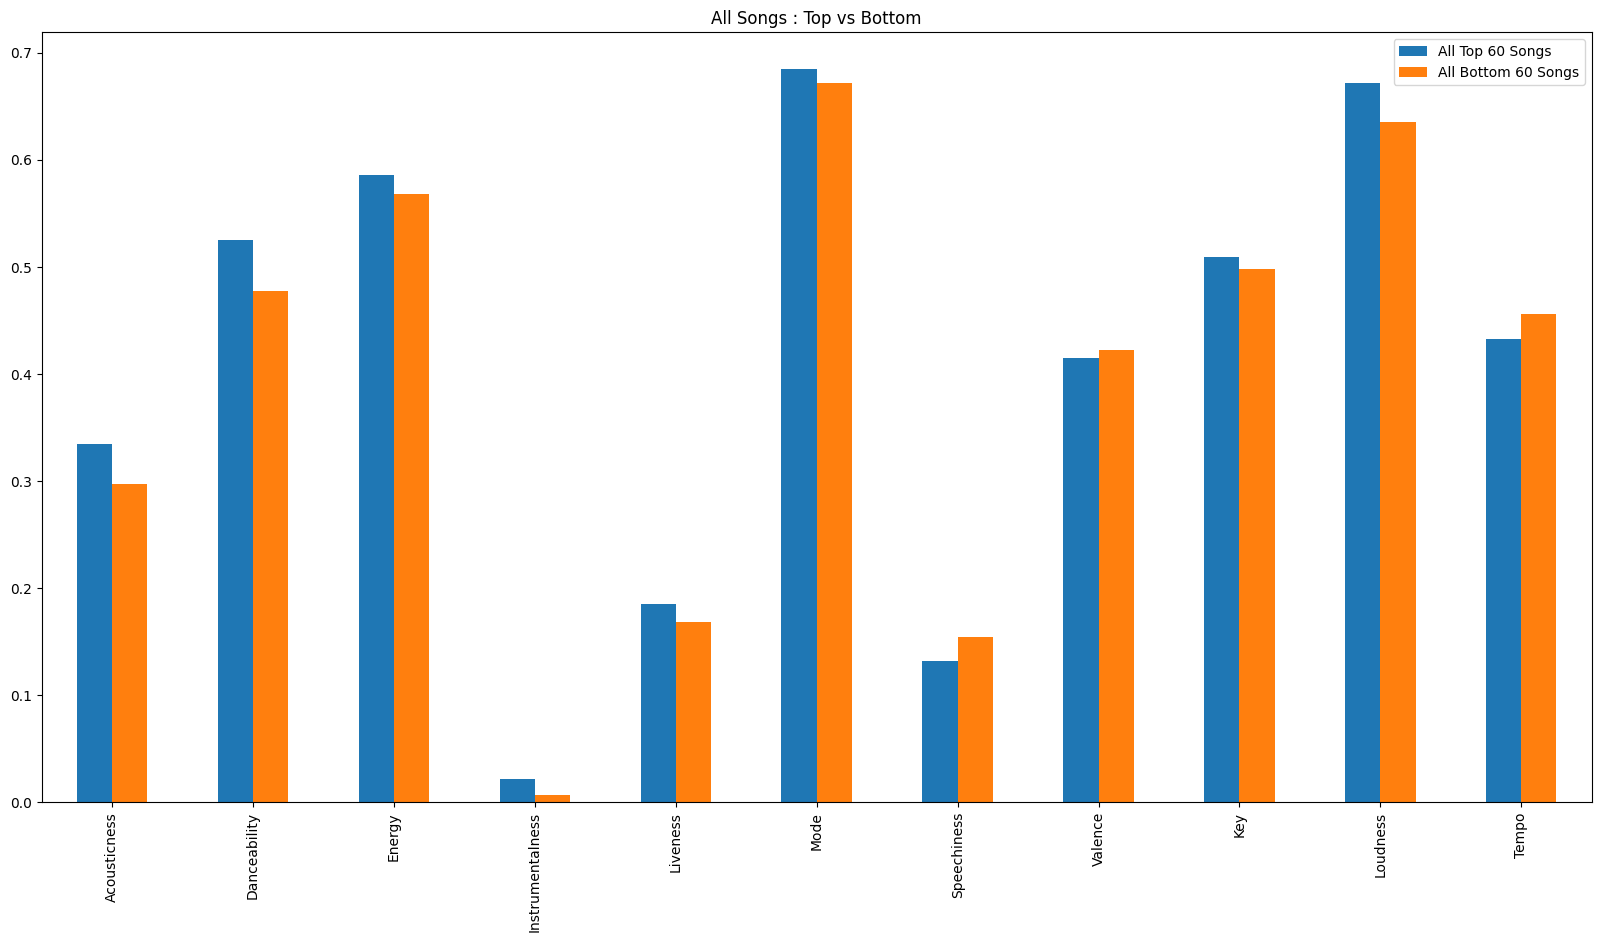

In [39]:
check = alls.sort_values(by = 'Popularity',ascending=False).head(73)[['Acousticness', 'Danceability','Energy', 'Instrumentalness', 'Liveness', 'Mode','Speechiness', 'Valence','Key','Loudness','Tempo']]
check = check.T
top = pd.DataFrame(check[check.columns].mean(axis = 1),columns = ['All Top 60 Songs'])

check = alls.sort_values(by = 'Popularity',ascending=False).tail(73)[['Acousticness', 'Danceability','Energy', 'Instrumentalness', 'Liveness', 'Mode','Speechiness', 'Valence','Key','Loudness','Tempo']]
check = check.T
bottom = pd.DataFrame(check[check.columns].mean(axis = 1),columns = ['All Bottom 60 Songs'])

# top_bottom = pd.concat([top,mid, bottom], axis = 1)
top_bottom = pd.concat([top, bottom], axis = 1)

top_bottom.plot(title = 'All Songs : Top vs Bottom', figsize=(20,10),linewidth=2,kind = 'bar' )

<AxesSubplot: title={'center': 'Top Popular Songs : Bd vs Ind'}>

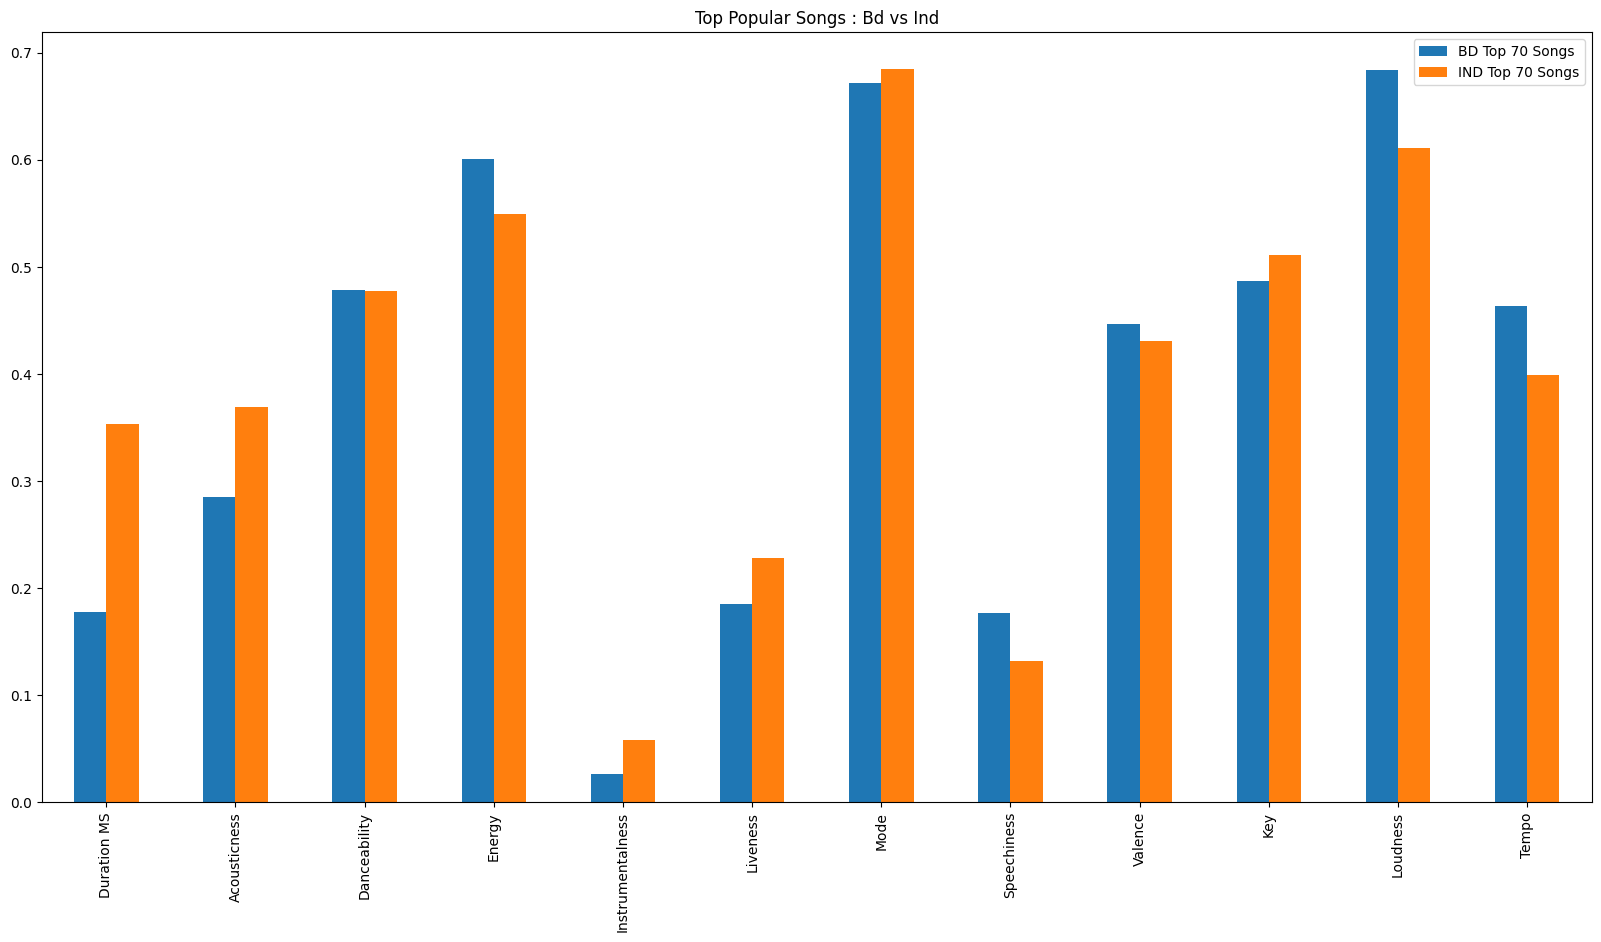

In [42]:
check = bd.sort_values(by = 'Popularity',ascending=False).head(73)[['Duration MS','Acousticness', 'Danceability','Energy', 'Instrumentalness', 'Liveness', 'Mode','Speechiness', 'Valence','Key','Loudness','Tempo']]
check = check.T
bd_top = pd.DataFrame(check[check.columns].mean(axis = 1),columns = ['BD Top 70 Songs'])

check = ind.sort_values(by = 'Popularity',ascending=False).head(73)[['Duration MS','Acousticness', 'Danceability','Energy', 'Instrumentalness', 'Liveness', 'Mode','Speechiness', 'Valence','Key','Loudness','Tempo']]
check = check.T
ind_top = pd.DataFrame(check[check.columns].mean(axis = 1),columns = ['IND Top 70 Songs'])

# top_bottom = pd.concat([top,mid, bottom], axis = 1)
top_bottom = pd.concat([bd_top, ind_top], axis = 1)

top_bottom.plot(title = 'Top Popular Songs : Bd vs Ind', figsize=(20,10),linewidth=2,kind = 'bar' )

Popularity    0.604608
dtype: float64


<AxesSubplot: title={'center': 'Popularity : Bd vs Ind'}>

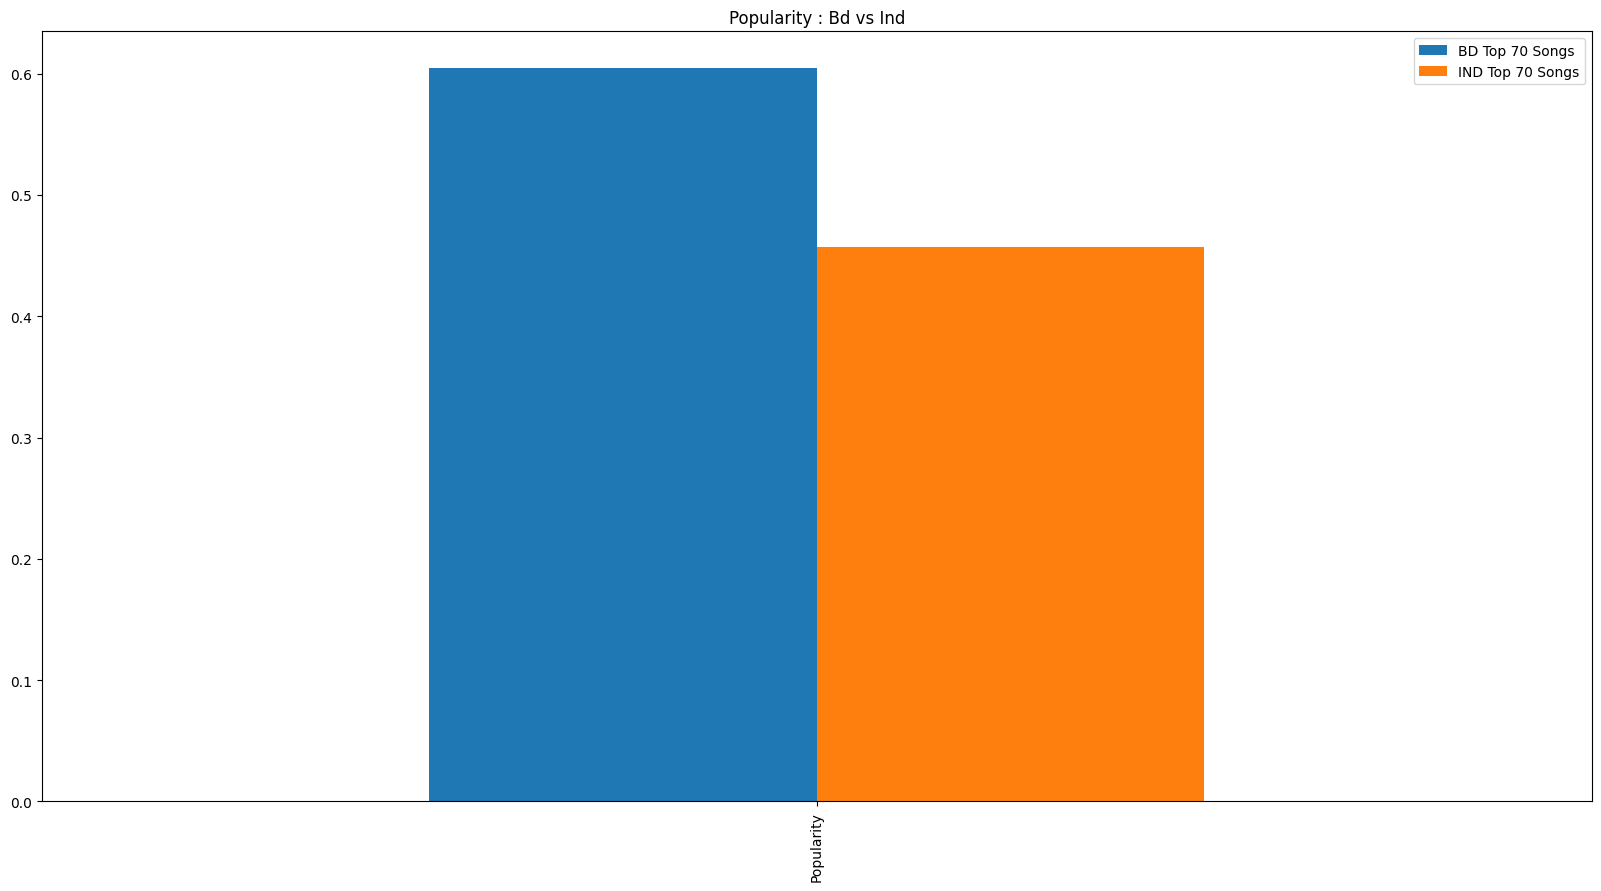

In [47]:
check = bd.sort_values(by = 'Popularity',ascending=False).head(73)[['Popularity']]
check = check.T
bd_top = pd.DataFrame(check[check.columns].mean(axis = 1),columns = ['BD Top 70 Songs'])
print(check[check.columns].mean(axis = 1))
check = ind.sort_values(by = 'Popularity',ascending=False).head(73)[['Popularity']]
check = check.T
ind_top = pd.DataFrame(check[check.columns].mean(axis = 1),columns = ['IND Top 70 Songs'])

# top_bottom = pd.concat([top,mid, bottom], axis = 1)
top_bottom = pd.concat([bd_top, ind_top], axis = 1)

top_bottom.plot(title = 'Popularity : Bd vs Ind', figsize=(20,10),linewidth=2,kind = 'bar')

<AxesSubplot: >

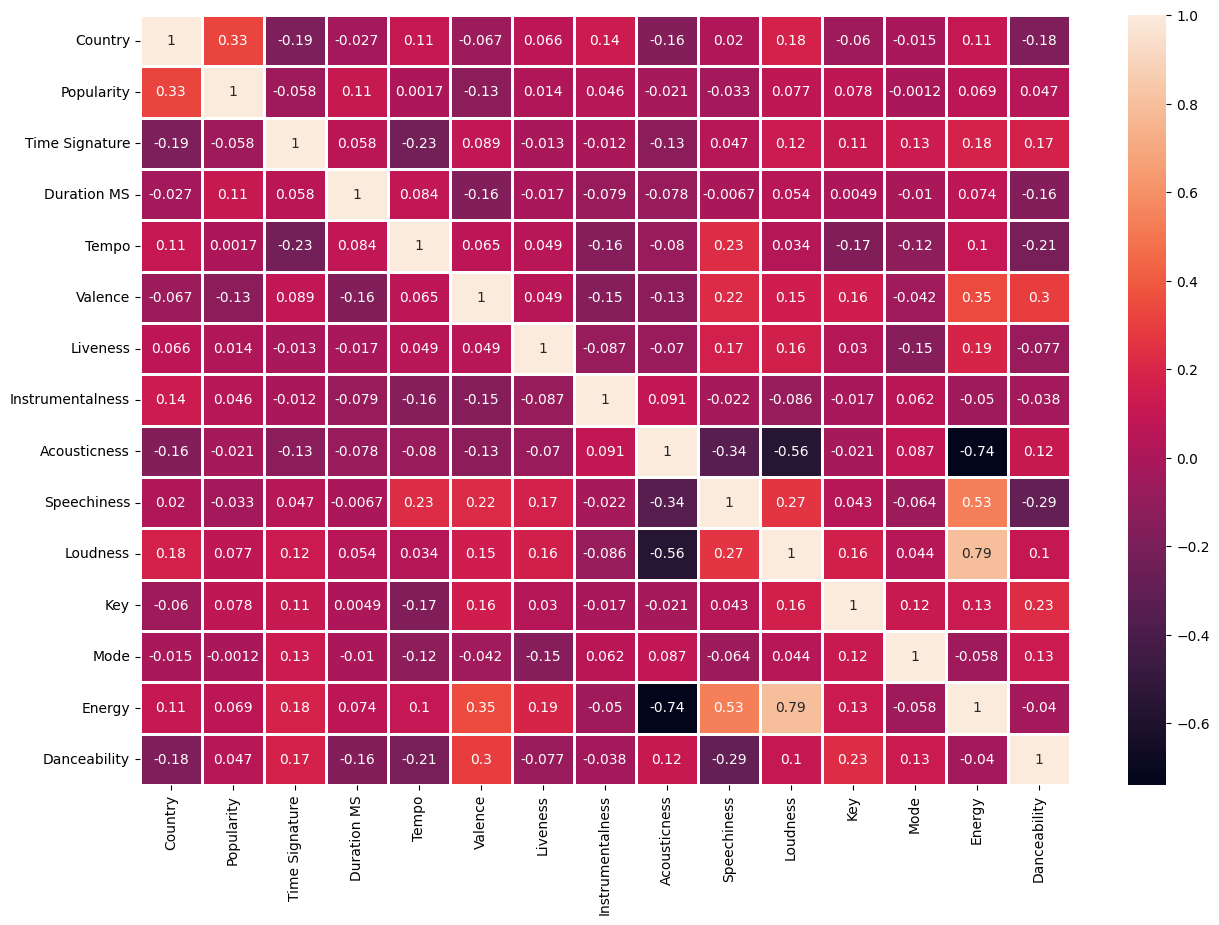

In [16]:
fig, ax = plt.subplots(figsize=(15,10))      
sns.heatmap(alls.corr(), annot=True,linewidths=.9, ax=ax)

**Stastical Analysis of Correlated Feature Starts**

In [17]:
scaled_all_song_correlated_features_csv_path = '../correlated_csv/scaled_all_song_correlated_features_csv.csv'
scaled_bangladesh_song_correlated_features_csv_path = '../correlated_csv/scaled_bangladesh_song_correlated_features_csv.csv'
scaled_kolkata_song_correlated_features_csv_path = '../correlated_csv/scaled_kolkata_song_correlated_features_csv.csv'

In [18]:
corr_alls = pd.read_csv(scaled_all_song_correlated_features_csv_path)
corr_bd = pd.read_csv(scaled_bangladesh_song_correlated_features_csv_path)
corr_ind = pd.read_csv(scaled_kolkata_song_correlated_features_csv_path)

In [19]:
corr_fieldnames = [
                    'Country', 
                    'Song Name', 
                    'Popularity', 
                    'Time Signature', 
                    'Duration MS', 
                    'Tempo', 
                    'Valence', 
                    'Liveness', 
                    'Instrumentalness', 
                    'Acousticness', 'Speechiness', 
                    'Loudness', 
                    'Key', 
                    'Mode', 
                    'Energy', 
                    'Danceability', 
                    'Energy-Loudness', 
                    'Energy-Speechiness', 
                    'Energy-Valence', 
                    'Energy-Liveness', 
                    'Energy-Tempo', 
                    'Acousticness-Mode', 
                    'Acousticness-Instrumentalness', 
                    'Acousticness-Danceability', 
                    'Danceability-Valence', 
                    'Danceability-Key', 
                    'Danceability-Mode', 
                    'Danceability-Loudness', 
                    'Danceability-Time Signature', 
                    'Loudness-Speechiness', 
                    'Loudness-Valence', 
                    'Loudness-Liveness', 
                    'Loudness-Key', 
                    'Loudness-Mode', 
                    'Loudness-Tempo', 
                    'Loudness-Time Signature', 
                    'Loudness-Duration MS', 
                    'Valence-Speechiness', 
                    'Valence-Key', 
                    'Valence-Liveness', 
                    'Valence-Tempo', 
                    'Valence-Time Signature', 
                    'Speechiness-Liveness', 
                    'Speechiness-Tempo', 
                    'Liveness-Tempo', 
                    'Liveness-Key', 
                    'Instrumentalness-Mode', 
                    'Tempo-Duration MS', 
                    'Key-Mode', 
                    'Key-Duration MS', 
                    'Key-Time Signature', 
                    'Duration MS-Time Signature'
                   ]

In [20]:
for i in range(len(corr_fieldnames)):
    print(i,corr_fieldnames[i])

0 Country
1 Song Name
2 Popularity
3 Time Signature
4 Duration MS
5 Tempo
6 Valence
7 Liveness
8 Instrumentalness
9 Acousticness
10 Speechiness
11 Loudness
12 Key
13 Mode
14 Energy
15 Danceability
16 Energy-Loudness
17 Energy-Speechiness
18 Energy-Valence
19 Energy-Liveness
20 Energy-Tempo
21 Acousticness-Mode
22 Acousticness-Instrumentalness
23 Acousticness-Danceability
24 Danceability-Valence
25 Danceability-Key
26 Danceability-Mode
27 Danceability-Loudness
28 Danceability-Time Signature
29 Loudness-Speechiness
30 Loudness-Valence
31 Loudness-Liveness
32 Loudness-Key
33 Loudness-Mode
34 Loudness-Tempo
35 Loudness-Time Signature
36 Loudness-Duration MS
37 Valence-Speechiness
38 Valence-Key
39 Valence-Liveness
40 Valence-Tempo
41 Valence-Time Signature
42 Speechiness-Liveness
43 Speechiness-Tempo
44 Liveness-Tempo
45 Liveness-Key
46 Instrumentalness-Mode
47 Tempo-Duration MS
48 Key-Mode
49 Key-Duration MS
50 Key-Time Signature
51 Duration MS-Time Signature


**All Songs (Corr = True) : Top vs Bottom**

<AxesSubplot: title={'center': 'All Songs : Top vs Bottom'}>

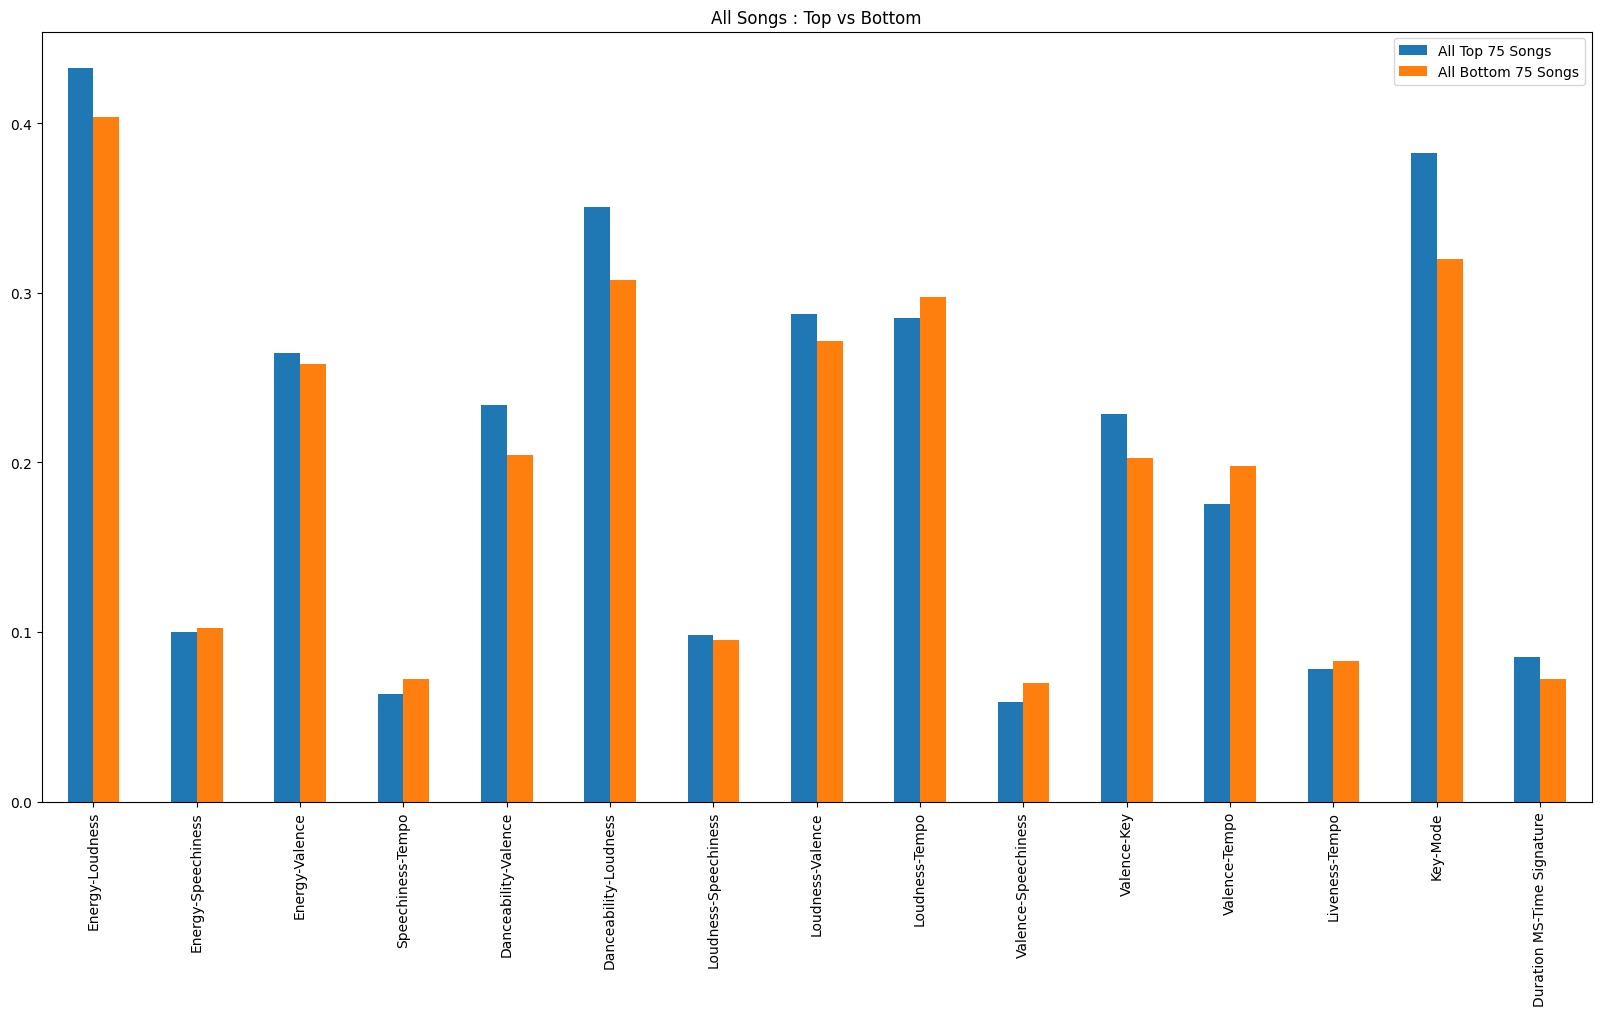

In [22]:
check = corr_alls.sort_values(by = 'Popularity',ascending=False).head(73)[[corr_fieldnames[16], corr_fieldnames[17], corr_fieldnames[18], corr_fieldnames[43], corr_fieldnames[24], corr_fieldnames[27], corr_fieldnames[29], corr_fieldnames[30], corr_fieldnames[34], corr_fieldnames[37], corr_fieldnames[38], corr_fieldnames[40], corr_fieldnames[44], corr_fieldnames[48], corr_fieldnames[51]]]
check = check.T
top = pd.DataFrame(check[check.columns].mean(axis = 1),columns = ['All Top 75 Songs'])

check = corr_alls.sort_values(by = 'Popularity',ascending=False).tail(73)[[corr_fieldnames[16], corr_fieldnames[17], corr_fieldnames[18], corr_fieldnames[43], corr_fieldnames[24], corr_fieldnames[27], corr_fieldnames[29], corr_fieldnames[30], corr_fieldnames[34], corr_fieldnames[37], corr_fieldnames[38], corr_fieldnames[40], corr_fieldnames[44], corr_fieldnames[48], corr_fieldnames[51]]]
check = check.T
bottom = pd.DataFrame(check[check.columns].mean(axis = 1),columns = ['All Bottom 75 Songs'])

# top_bottom = pd.concat([top,mid, bottom], axis = 1)
top_bottom = pd.concat([top, bottom], axis = 1)

top_bottom.plot(title = 'All Songs : Top vs Bottom', figsize=(20,10),linewidth=2,kind = 'bar' )

<AxesSubplot: title={'center': 'All Songs : Top vs Bottom'}>

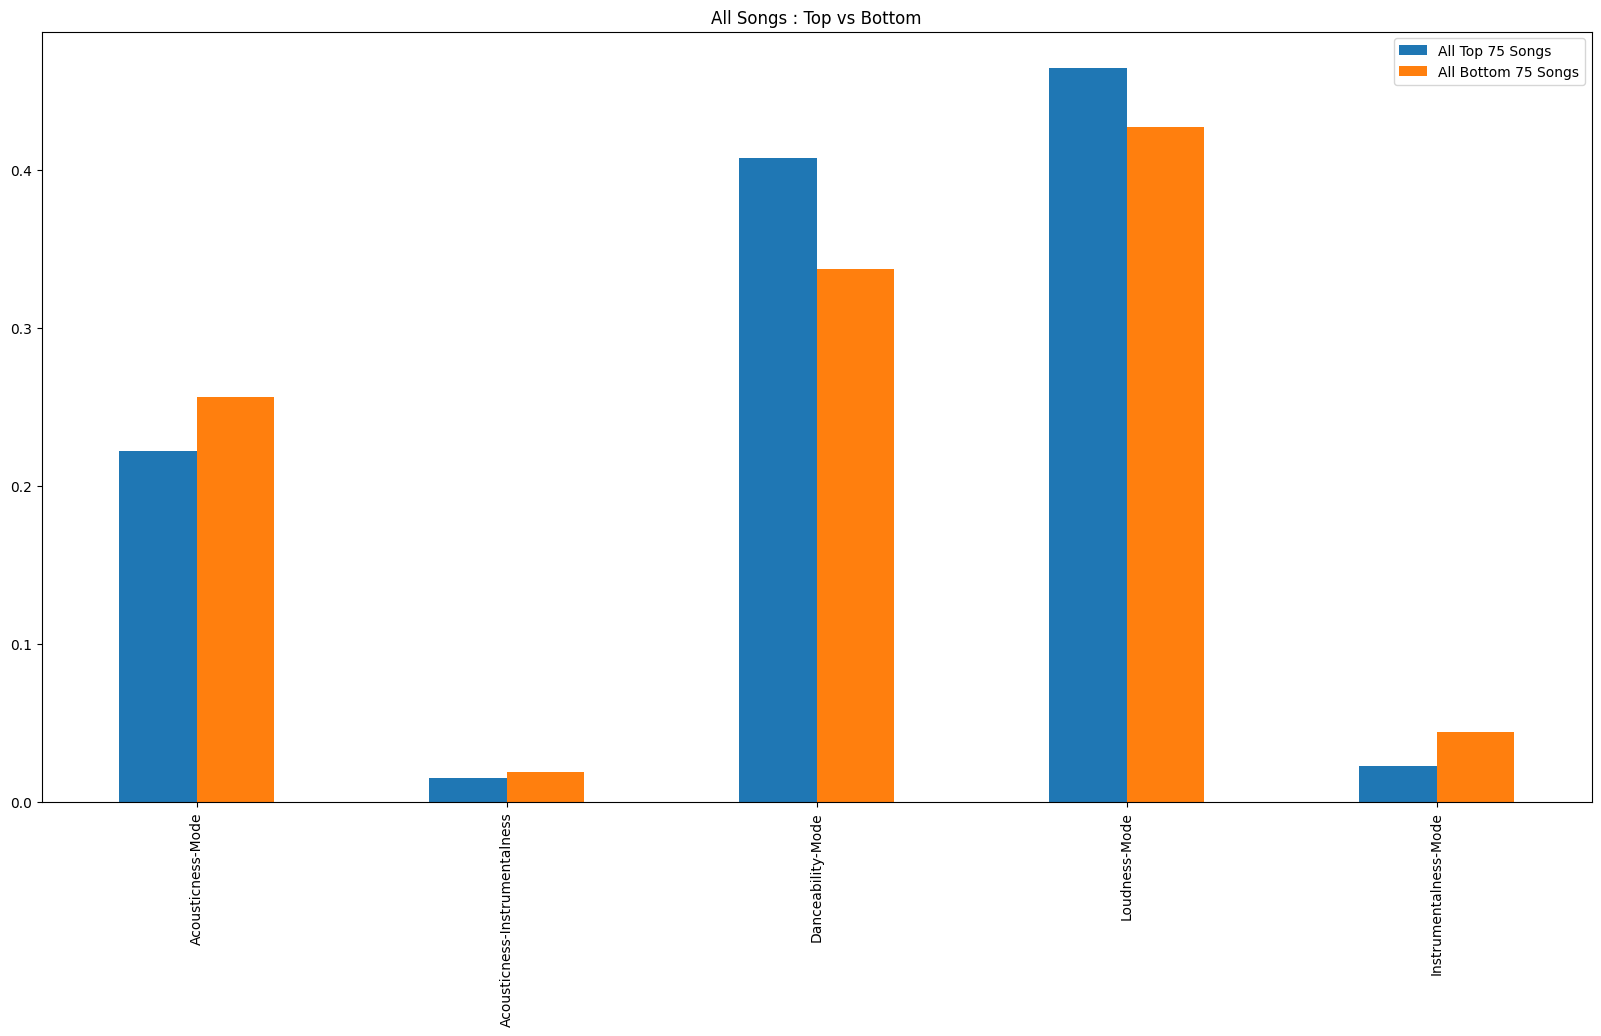

In [23]:
check = corr_bd.sort_values(by = 'Popularity',ascending=False).head(73)[[corr_fieldnames[21], corr_fieldnames[22], corr_fieldnames[26], corr_fieldnames[33], corr_fieldnames[46]]]
check = check.T
top = pd.DataFrame(check[check.columns].mean(axis = 1),columns = ['All Top 75 Songs'])

check = corr_ind.sort_values(by = 'Popularity',ascending=False).tail(73)[[corr_fieldnames[21], corr_fieldnames[22], corr_fieldnames[26], corr_fieldnames[33], corr_fieldnames[46]]]
check = check.T
bottom = pd.DataFrame(check[check.columns].mean(axis = 1),columns = ['All Bottom 75 Songs'])

# top_bottom = pd.concat([top,mid, bottom], axis = 1)
top_bottom = pd.concat([top, bottom], axis = 1)

top_bottom.plot(title = 'All Songs : Top vs Bottom', figsize=(20,10),linewidth=2,kind = 'bar' )

**Popularity : BD vs IND**

<AxesSubplot: title={'center': 'Popularity : Bd vs Ind'}>

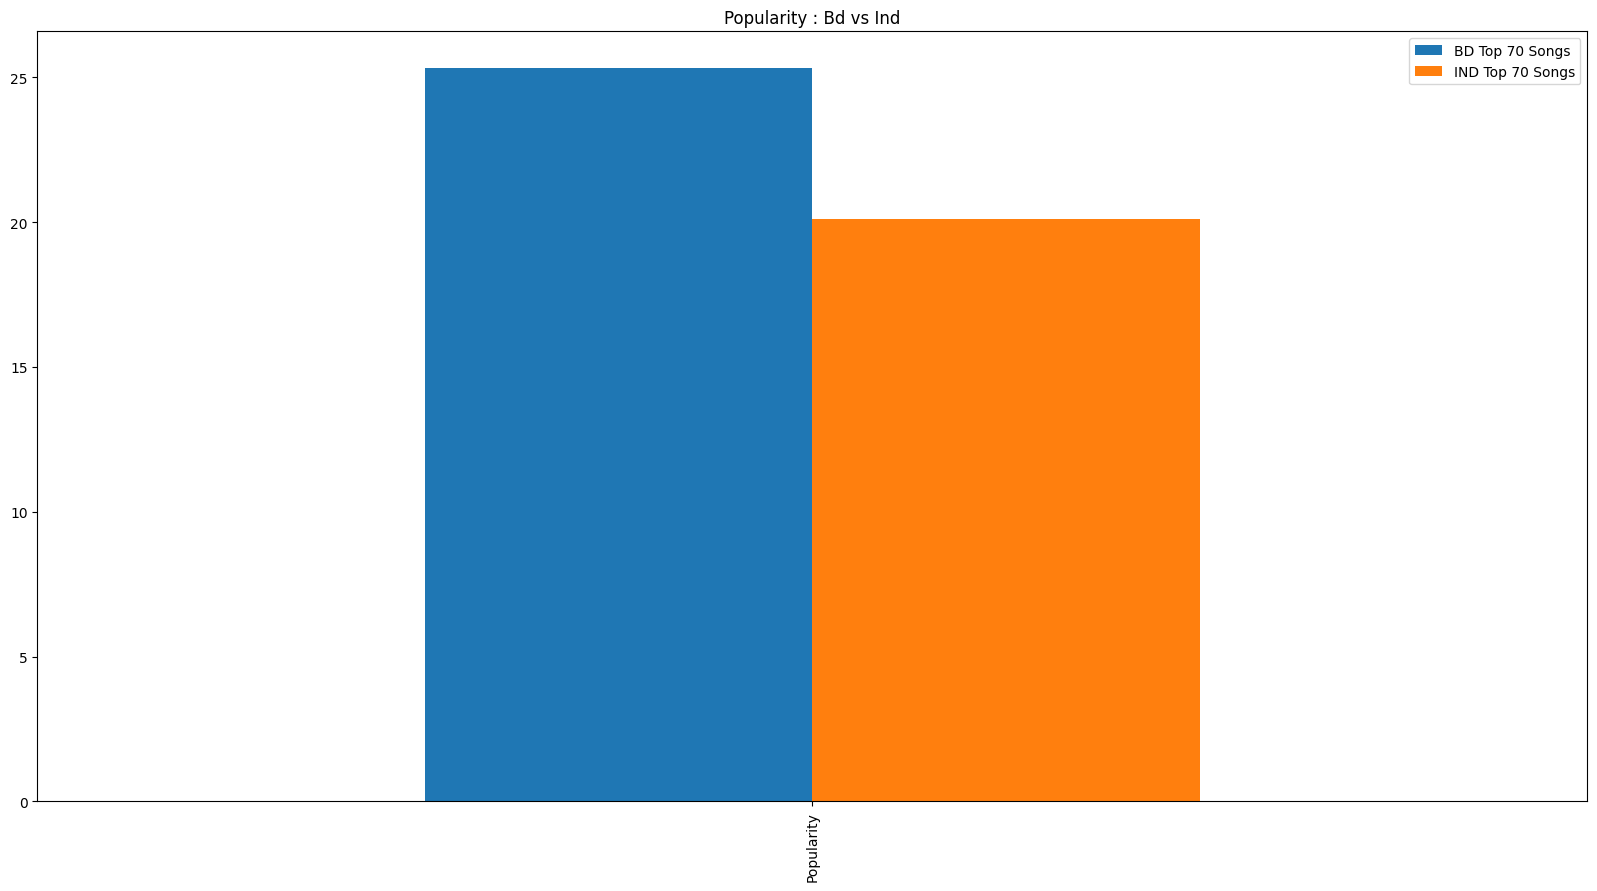

In [49]:
bd_non_scaled = pd.read_csv('../backup_csv/backup_bangladesh_song_features_csv.csv')
ind_non_scaled = pd.read_csv('../backup_csv/backup_kolkata_song_features_csv.csv')

check = bd_non_scaled.sort_values(by = 'Popularity',ascending=False).head(73)[['Popularity']]
check = check.T
bd_top = pd.DataFrame(check[check.columns].mean(axis = 1),columns = ['BD Top 70 Songs'])

check = ind_non_scaled.sort_values(by = 'Popularity',ascending=False).head(73)[['Popularity']]
check = check.T
ind_top = pd.DataFrame(check[check.columns].mean(axis = 1),columns = ['IND Top 70 Songs'])

# top_bottom = pd.concat([top,mid, bottom], axis = 1)
top_bottom = pd.concat([bd_top, ind_top], axis = 1)

top_bottom.plot(title = 'Popularity : Bd vs Ind', figsize=(20,10),linewidth=2,kind = 'bar')

**Top Songs : BD vs IND**

<AxesSubplot: title={'center': 'Top Songs : BD vs IND'}>

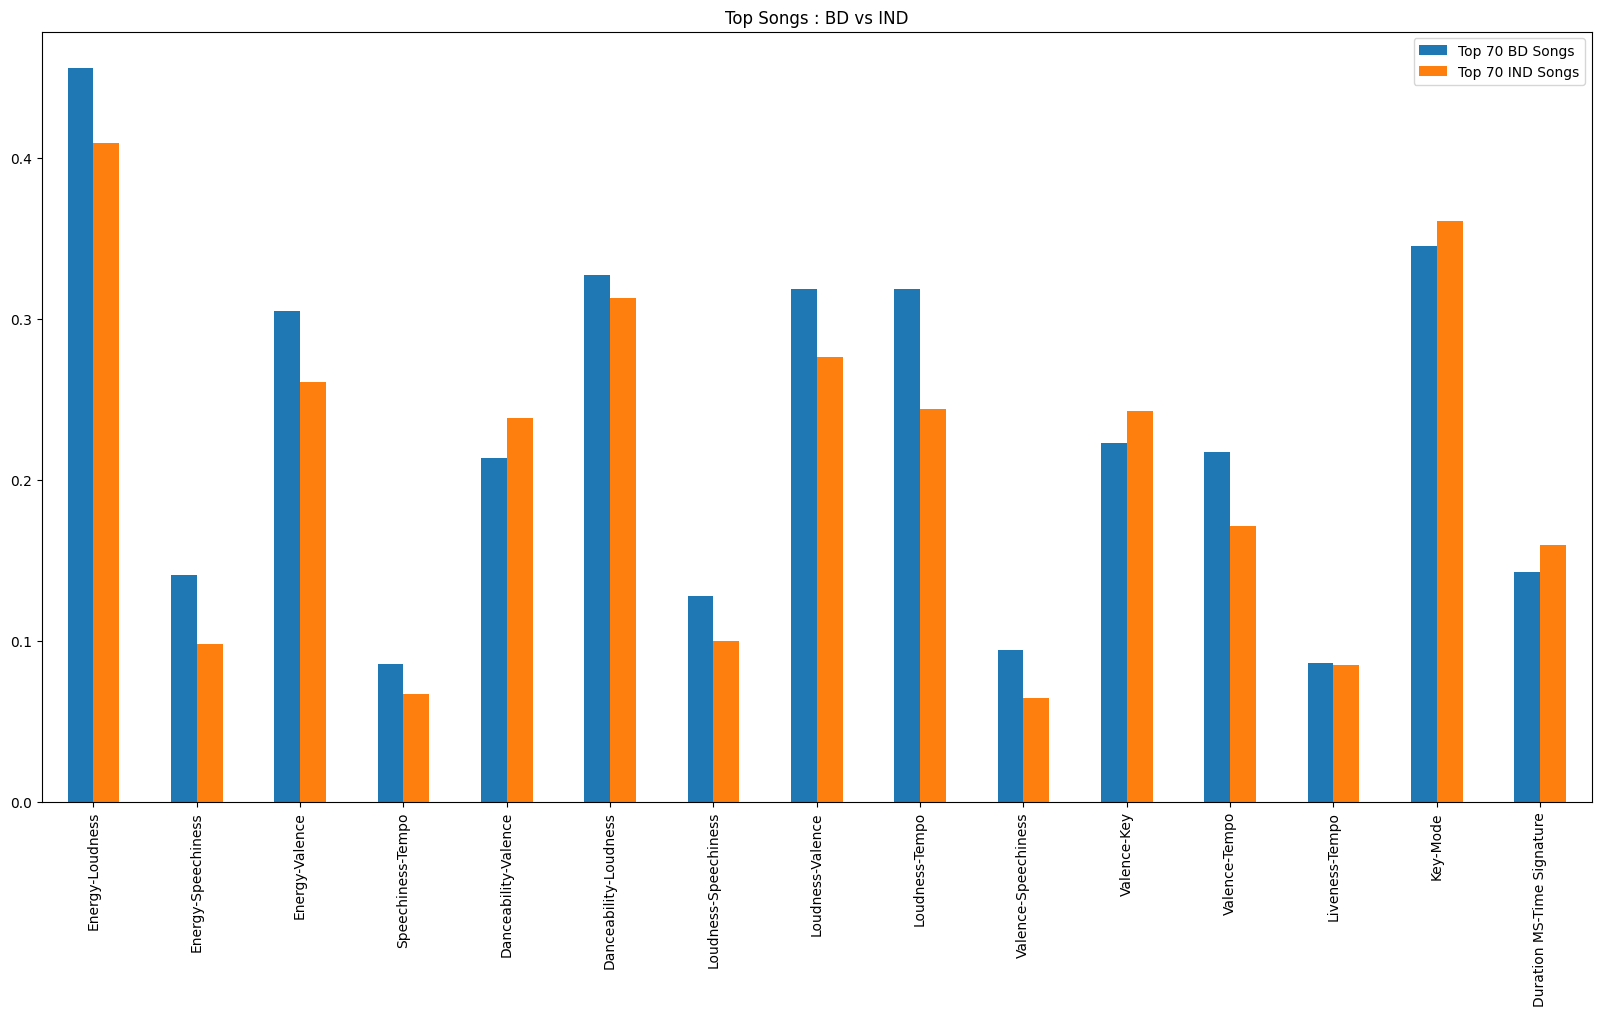

In [97]:
check = corr_bd.sort_values(by = 'Popularity',ascending=False).head(70)[[corr_fieldnames[16], corr_fieldnames[17], corr_fieldnames[18], corr_fieldnames[43], corr_fieldnames[24], corr_fieldnames[27], corr_fieldnames[29], corr_fieldnames[30], corr_fieldnames[34], corr_fieldnames[37], corr_fieldnames[38], corr_fieldnames[40], corr_fieldnames[44], corr_fieldnames[48], corr_fieldnames[51]]]
check = check.T
top = pd.DataFrame(check[check.columns].mean(axis = 1),columns = ['Top 70 BD Songs'])

check = corr_ind.sort_values(by = 'Popularity',ascending=False).head(70)[[corr_fieldnames[16], corr_fieldnames[17], corr_fieldnames[18], corr_fieldnames[43], corr_fieldnames[24], corr_fieldnames[27], corr_fieldnames[29], corr_fieldnames[30], corr_fieldnames[34], corr_fieldnames[37], corr_fieldnames[38], corr_fieldnames[40], corr_fieldnames[44], corr_fieldnames[48], corr_fieldnames[51]]]
check = check.T
bottom = pd.DataFrame(check[check.columns].mean(axis = 1),columns = ['Top 70 IND Songs'])

# top_bottom = pd.concat([top,mid, bottom], axis = 1)
top_bottom = pd.concat([top, bottom], axis = 1)

top_bottom.plot(title = 'Top Songs : BD vs IND', figsize=(20,10),linewidth=2,kind = 'bar' )

In [32]:
def pearcon_correlarion(df,key_name1,key_name2):
    corr, _ = pearsonr(df[key_name1], df[key_name2])
    return corr

In [40]:
def kendalltau_correlation(df,key_name1,key_name2):
    corr, _ = kendalltau(df[key_name1], df[key_name2])
    return corr

In [34]:
corr_arr_of_dataframes = [corr_alls,corr_bd,corr_ind]

In [37]:
print("All Songs")
for i in range(4,16):
    corr = pearcon_correlarion(corr_arr_of_dataframes[0],corr_fieldnames[2],corr_fieldnames[i])
    print(corr_fieldnames[2],'X',corr_fieldnames[i],':',corr)

All Songs
Popularity X Duration MS : 0.09001551488155303
Popularity X Tempo : 0.008567141125644002
Popularity X Valence : -0.10626550695250067
Popularity X Liveness : 0.056634059998364364
Popularity X Instrumentalness : 0.05443502341390231
Popularity X Acousticness : 0.029905654684611805
Popularity X Speechiness : -0.05673002561847108
Popularity X Loudness : 0.07267334117748733
Popularity X Key : 0.056783477026167865
Popularity X Mode : 0.010954422029436668
Popularity X Energy : 0.050209924172348715
Popularity X Danceability : 0.040443883663319795


In [43]:
print("All Songs")
for i in range(4,16):
    corr = kendalltau_correlation(corr_arr_of_dataframes[0],corr_fieldnames[2],corr_fieldnames[i])
    print(corr_fieldnames[2],'X',corr_fieldnames[i],':',corr)

All Songs
Popularity X Duration MS : 0.09049610197544455
Popularity X Tempo : 0.0044144439988021734
Popularity X Valence : -0.08247619004116576
Popularity X Liveness : 0.030171222138759137
Popularity X Instrumentalness : -0.05103764014387055
Popularity X Acousticness : 0.04831432758528197
Popularity X Speechiness : -0.03953832055910732
Popularity X Loudness : 0.06366986536733904
Popularity X Key : 0.039347581613885775
Popularity X Mode : 0.01349744591848282
Popularity X Energy : 0.019023241578659176
Popularity X Danceability : 0.044379357366587505


In [44]:
print("BD Songs")
for i in range(4,16):
    corr = kendalltau_correlation(corr_arr_of_dataframes[1],corr_fieldnames[2],corr_fieldnames[i])
    print(corr_fieldnames[2],'X',corr_fieldnames[i],':',corr)

BD Songs
Popularity X Duration MS : 0.04824882971818623
Popularity X Tempo : -0.02748351059896684
Popularity X Valence : -0.026880863784449784
Popularity X Liveness : 0.01681829004441601
Popularity X Instrumentalness : -0.07491283736024444
Popularity X Acousticness : 0.20276723375237757
Popularity X Speechiness : -0.10337164851561177
Popularity X Loudness : -0.02626202123901276
Popularity X Key : 0.01660273692766026
Popularity X Mode : 0.0981934631107578
Popularity X Energy : -0.07790515276323598
Popularity X Danceability : 0.10179636128387635


In [45]:
print("IND Songs")
for i in range(4,16):
    corr = kendalltau_correlation(corr_arr_of_dataframes[2],corr_fieldnames[2],corr_fieldnames[i])
    print(corr_fieldnames[2],'X',corr_fieldnames[i],':',corr)

IND Songs
Popularity X Duration MS : 0.15080666937960246
Popularity X Tempo : -0.009233061390587905
Popularity X Valence : -0.11699665564948
Popularity X Liveness : 0.030421124641418294
Popularity X Instrumentalness : -0.05113030345666611
Popularity X Acousticness : -0.08657643029903121
Popularity X Speechiness : 0.03196143474984454
Popularity X Loudness : 0.12541575055548573
Popularity X Key : 0.12187868996775622
Popularity X Mode : -0.05465670559868272
Popularity X Energy : 0.10085185572083742
Popularity X Danceability : 0.05396232984387949


In [ ]:
def correlation(df):
    df.corr()

In [ ]:

def resize(input_path,output_path,rows_to_delete):
    df = pd.read_csv(input_path)

    # Sort dataframe by key (assuming key column is named "key")
    df_sorted = df.sort_values(by=['Popularity'])

#     Delete first n rows (assuming n is 5)
    df_final = df_sorted.iloc[rows_to_delete:]

#     Save modified dataframe to a new CSV file
    df_final.to_csv(output_path, index=False)
#     df_sorted.to_csv(output_path, index=False)

In [ ]:
resize(scaled_bangladesh_backup_csv_pathscaled_bangladesh_backup_csv_path,0)